In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T


In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


With the above we can see first 5 rows of our dataset, by which we can see which factors are affecting minimum and maximum tempreature.

In [4]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


With the above we can see last 5 rows of our dataset, by which we can see which factors are affecting minimum and maximum tempreature.

In [7]:
df.shape

(7752, 25)

By the above function we can see that we are having 7752 rows and 25 columns in our dataset.

In [8]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Here are the column name of our dataset in which all the columns may not be helpful for us, we'll see further by our analysis.

In [9]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Here we can see that all of our columns are having float datatype which can work with machine learning model however we need t deal with date column as it is showing object datatype and we need to change it to date data type .

In [13]:
#Here we go-
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [14]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

Great! now we have all the columns ready to work with by which we can proceed further for analysis and model.

In [23]:
#let's quickly check null values now.
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can see we are having null values in our data and in sum columns values are same and in this case it is better to drop them instead of changing.

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

And it's done we've succesfully treated all the null values in one go let's proceed further.

<Axes: >

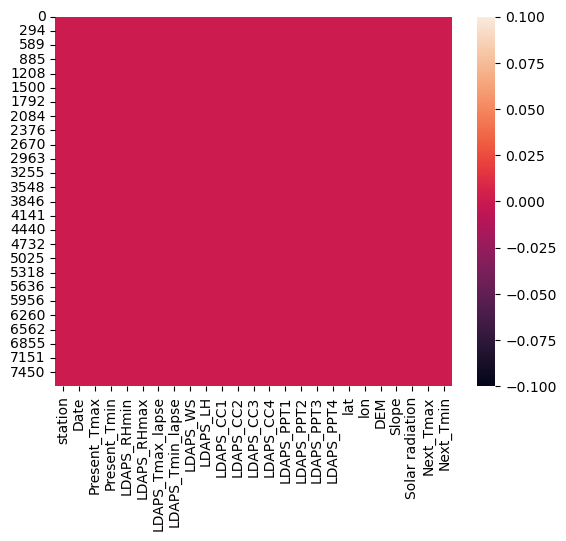

In [26]:
#let's also check heatmap of null values after treatment
sns.heatmap(df.isnull())

We can see that colour of our heatmap is almost near to 0 this means we are not havong any null values now as we checked above.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


We can see now we have successfully sorted all the the columns it's datatypes and null values present in our data, now let's analys it further.

In [28]:
#Let's check unique values in our data
df.nunique().to_frame("Unique values")

,Unique values
station,25
Date,307
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7585
LDAPS_RHmax,7577
LDAPS_Tmax_lapse,7588
LDAPS_Tmin_lapse,7588
LDAPS_WS,7588
LDAPS_LH,7588


We can see we are having maximum unique values in numeric column which will be helpful in analysing data.

In [29]:
df.duplicated().sum()

0

By the above we can see that we do not have any duplicated column in our dataset and it is a good sign as we do not have to lose more data, which we've alrteady lost to remove null values.

In [30]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


Now let's check correlation between different columns.

In [31]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.007635,-0.013865,-0.011085,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.104779,-0.127248,-0.107295,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,0.066207,-0.052428,-0.070391,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.389572,0.237512,0.167311,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.227581,0.132436,0.118101,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.248369,-0.193749,-0.170415,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.002743,-0.093116,-0.103541,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.181634,0.147199,0.134428,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,-0.084375,0.009495,0.012372,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,0.389368,0.166763,0.088897,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877


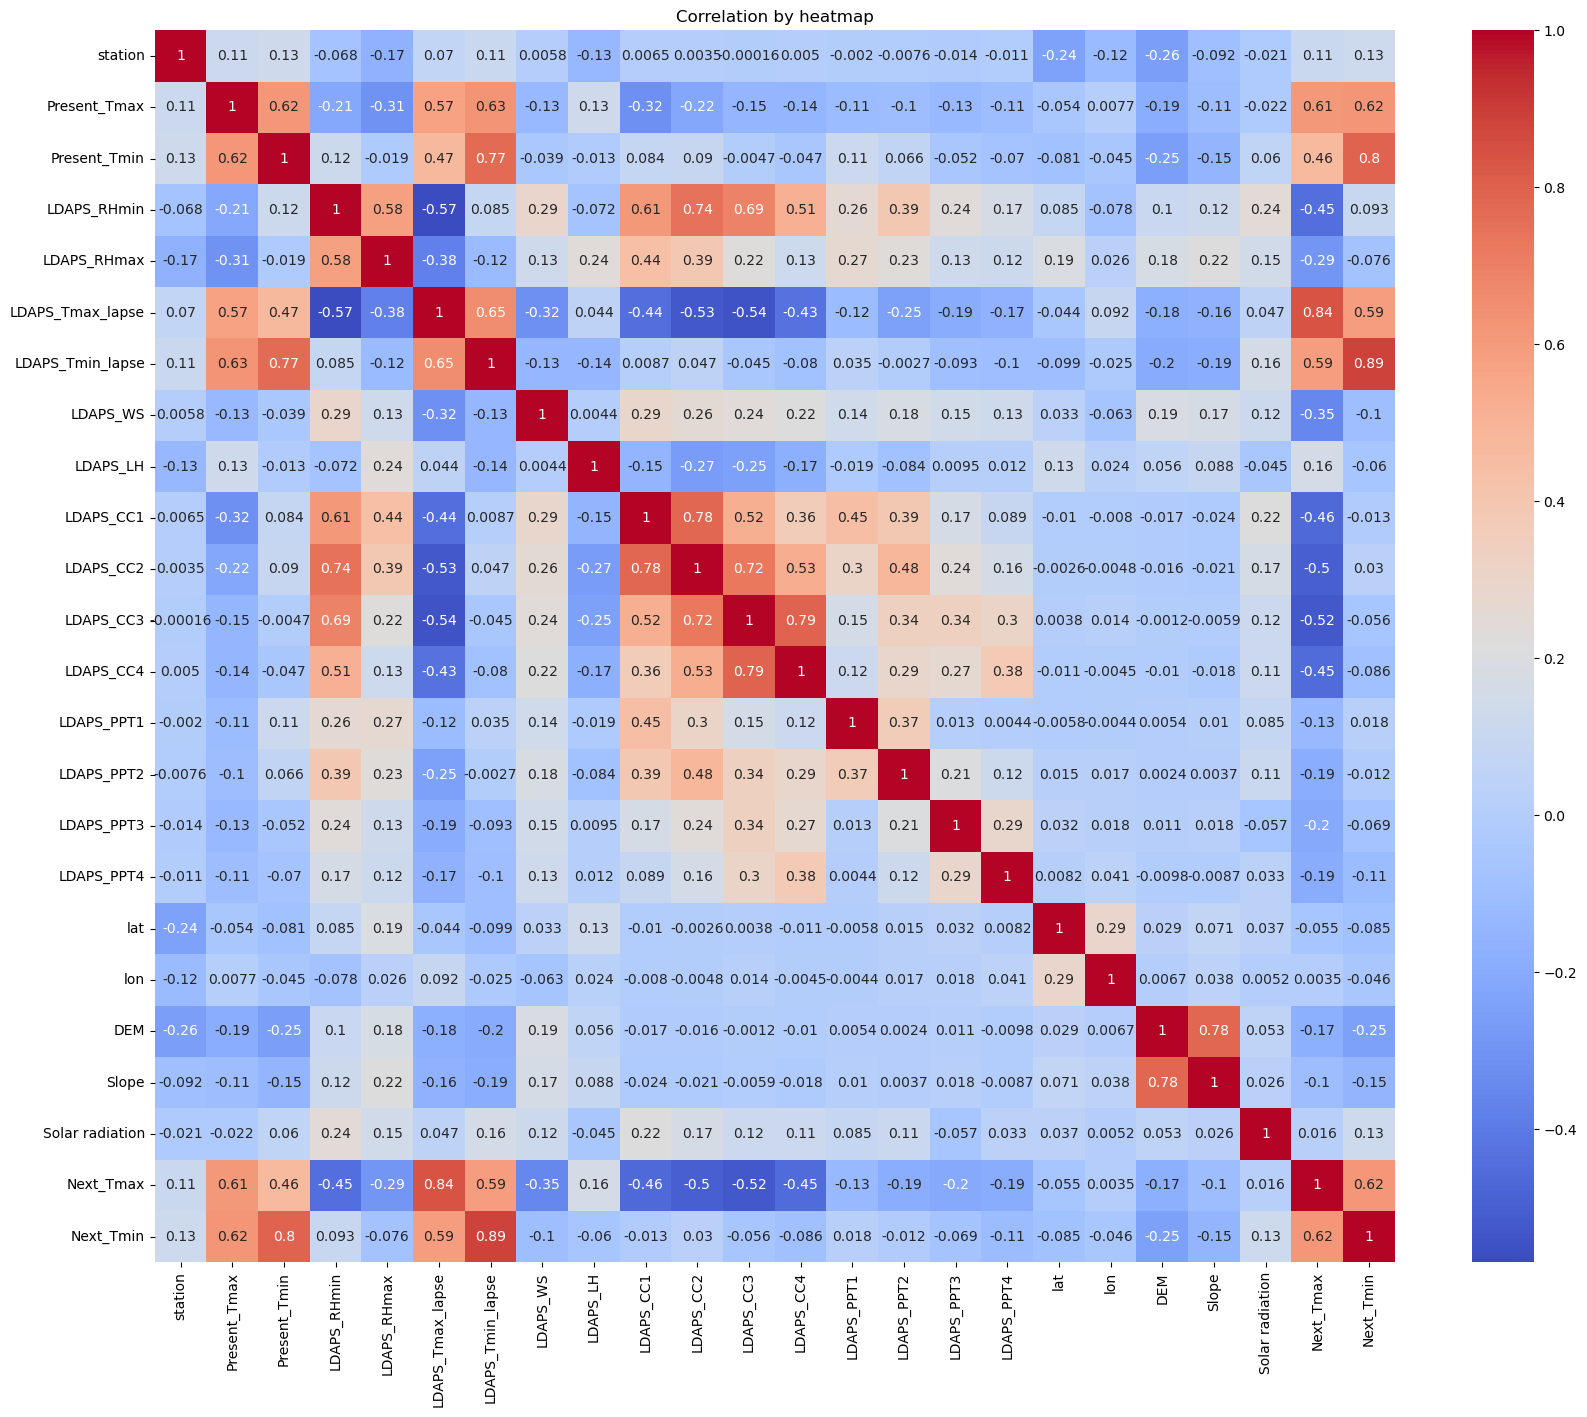

In [32]:
#As it is noteasy to understand correlation via above ode let's check it by making and correlation matrix(heatmap)
correlation = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation by heatmap')
plt.show()

That's great, we can see that we are not haviong too much correlation in our data.

In [34]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

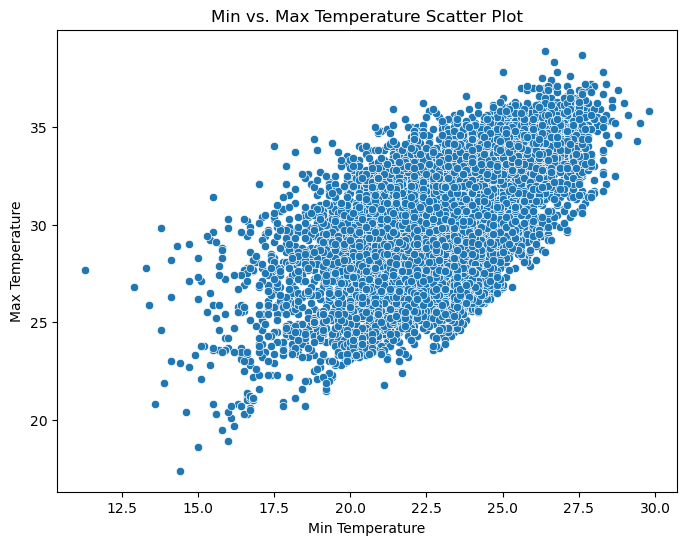

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Next_Tmin'], y=df['Next_Tmax'])
plt.xlabel('Min Temperature')
plt.ylabel('Max Temperature')
plt.title('Min vs. Max Temperature Scatter Plot')
plt.show()


By the above scatter plot we can see relationship between minimum and maximum tempreature

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24]),
 [Text(1, 0, 'station'),
  Text(2, 0, 'Present_Tmax'),
  Text(3, 0, 'Present_Tmin'),
  Text(4, 0, 'LDAPS_RHmin'),
  Text(5, 0, 'LDAPS_RHmax'),
  Text(6, 0, 'LDAPS_Tmax_lapse'),
  Text(7, 0, 'LDAPS_Tmin_lapse'),
  Text(8, 0, 'LDAPS_WS'),
  Text(9, 0, 'LDAPS_LH'),
  Text(10, 0, 'LDAPS_CC1'),
  Text(11, 0, 'LDAPS_CC2'),
  Text(12, 0, 'LDAPS_CC3'),
  Text(13, 0, 'LDAPS_CC4'),
  Text(14, 0, 'LDAPS_PPT1'),
  Text(15, 0, 'LDAPS_PPT2'),
  Text(16, 0, 'LDAPS_PPT3'),
  Text(17, 0, 'LDAPS_PPT4'),
  Text(18, 0, 'lat'),
  Text(19, 0, 'lon'),
  Text(20, 0, 'DEM'),
  Text(21, 0, 'Slope'),
  Text(22, 0, 'Solar radiation'),
  Text(23, 0, 'Next_Tmax'),
  Text(24, 0, 'Next_Tmin')])

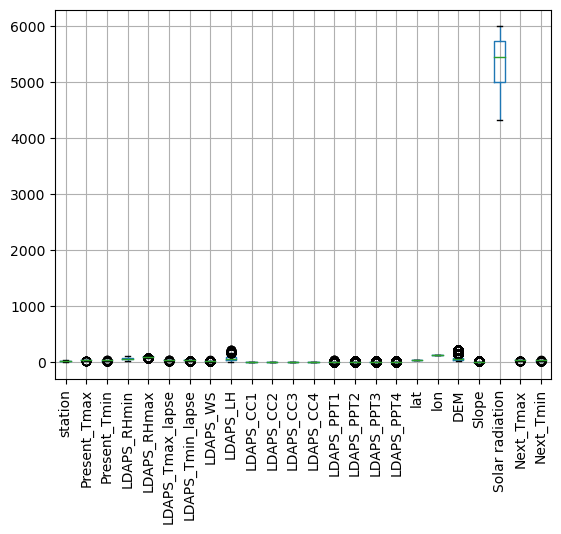

In [38]:
# lets check outiers with the help of boxlot
df.boxplot()
plt.xticks(rotation=90)

With the help of above plot we can see that we are not having too much Outliers, let's only check  for LDAPS_LH and DEM

In [42]:
#Let's find outlier with Zscore method
outliers=df[['LDAPS_LH','DEM']]
z=np.abs(zscore(outliers))
z

,LDAPS_LH,DEM
0,0.206603,2.769091
1,0.313359,0.315828
2,1.244497,0.526719
3,0.096026,0.298272
4,1.349989,0.494848
...,...,...
7745,1.569844,0.655747
7746,0.583486,0.735482
7747,0.283984,0.852919
7748,0.452772,0.821476


In [43]:
np.where(z>3)

(array([1738, 1739, 1741, 1751, 1754, 2139, 2141, 2314, 2316, 2401, 3061,
        3073, 3397, 3410, 3422, 3435, 3437, 3447, 5518, 5865, 5964, 6393,
        6692, 6890, 6914, 7446, 7521], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0], dtype=int64))

Here we go- we've successfully detected outliers here let's removed them in next step

In [44]:
df1=df[(z<3).all(axis=1)]

And it's done we've successfully removed outliers from the data and it's ready to work with now.

In [46]:
df1.shape

(7561, 25)

we can see earlier we were having 7588 rows however after removing outliers we are having 7561 rows that means we have successfuly removed outliers without too much dataloss.

In [48]:
#now let's check skewnesss in our data
df1.skew()

station            -0.007826
Present_Tmax       -0.254687
Present_Tmin       -0.354823
LDAPS_RHmin         0.299003
LDAPS_RHmax        -0.845165
LDAPS_Tmax_lapse   -0.220662
LDAPS_Tmin_lapse   -0.571220
LDAPS_WS            1.551772
LDAPS_LH            0.583856
LDAPS_CC1           0.456541
LDAPS_CC2           0.470228
LDAPS_CC3           0.635704
LDAPS_CC4           0.661255
LDAPS_PPT1          5.295850
LDAPS_PPT2          5.699607
LDAPS_PPT3          6.344795
LDAPS_PPT4          6.669080
lat                 0.089330
lon                -0.289390
DEM                 1.718700
Slope               1.556536
Solar radiation    -0.522124
Next_Tmax          -0.334114
Next_Tmin          -0.398103
dtype: float64

By the above we can see that skewness is present in our dataset which needs to be treated.

In [49]:
df1['LDAPS_PPT4']=np.cbrt(df1['LDAPS_PPT4'])
df1['LDAPS_PPT3']=np.cbrt(df1['LDAPS_PPT3'])
df1['LDAPS_PPT2']=np.cbrt(df1['LDAPS_PPT2'])
df1['LDAPS_PPT1']=np.cbrt(df1['LDAPS_PPT1'])
df1['DEM']=np.cbrt(df1['DEM'])
df1['Slope']=np.cbrt(df1['Slope'])
df1['LDAPS_WS']=np.cbrt(df1['LDAPS_WS'])


In [52]:
df1.skew()

station            -0.007826
Present_Tmax       -0.254687
Present_Tmin       -0.354823
LDAPS_RHmin         0.299003
LDAPS_RHmax        -0.845165
LDAPS_Tmax_lapse   -0.220662
LDAPS_Tmin_lapse   -0.571220
LDAPS_WS            0.723859
LDAPS_LH            0.583856
LDAPS_CC1           0.456541
LDAPS_CC2           0.470228
LDAPS_CC3           0.635704
LDAPS_CC4           0.661255
LDAPS_PPT1          1.141609
LDAPS_PPT2          1.350590
LDAPS_PPT3          1.009886
LDAPS_PPT4          1.772884
lat                 0.089330
lon                -0.289390
DEM                 0.671590
Slope               0.342678
Solar radiation    -0.522124
Next_Tmax          -0.334114
Next_Tmin          -0.398103
dtype: float64

We can see skewness is still present in data, let's try square root method.

In [53]:
df1['LDAPS_PPT4']=np.sqrt(df1['LDAPS_PPT4'])
df1['LDAPS_PPT3']=np.sqrt(df1['LDAPS_PPT3'])
df1['LDAPS_PPT3']=np.sqrt(df1['LDAPS_PPT3'])
df1['LDAPS_PPT2']=np.sqrt(df1['LDAPS_PPT2'])
df1['LDAPS_PPT1']=np.sqrt(df1['LDAPS_PPT1'])

In [54]:
df1.skew()

station            -0.007826
Present_Tmax       -0.254687
Present_Tmin       -0.354823
LDAPS_RHmin         0.299003
LDAPS_RHmax        -0.845165
LDAPS_Tmax_lapse   -0.220662
LDAPS_Tmin_lapse   -0.571220
LDAPS_WS            0.723859
LDAPS_LH            0.583856
LDAPS_CC1           0.456541
LDAPS_CC2           0.470228
LDAPS_CC3           0.635704
LDAPS_CC4           0.661255
LDAPS_PPT1          0.744754
LDAPS_PPT2          0.929131
LDAPS_PPT3          0.830596
LDAPS_PPT4          1.340912
lat                 0.089330
lon                -0.289390
DEM                 0.671590
Slope               0.342678
Solar radiation    -0.522124
Next_Tmax          -0.334114
Next_Tmin          -0.398103
dtype: float64

In [ ]:
We can see we have successfully removed skewness from every column it is just LDAPS_PPT4 still having skewness so let's drop this column.

In [55]:
df1.drop('LDAPS_PPT4', axis=1, inplace=True)


In [65]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day


# As now our data is ready to work let's divide it into dependent and target variable first we are building an model for Next_tmax(next day maximum tempreature) that is a Regression model

In [71]:
features = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','lat','lon','DEM','Slope','Solar radiation','Next_Tmin']
target = 'Next_Tmax'

In [72]:
x = df1[features]
y = df1[target]

In [73]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (7561, 22)
dimension of dependent variable: (7561,)


We can see that we are having same number of rows that is 7561 and 22 columns in indpendent variable wich means we are going good and can perform training and prediction.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [75]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = 42)

Now we'll check different models so that we can understand which model would be more efficient for us.

In [76]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2 score: 0.7912244491289466
R2 score on training Data: 100.0
Mean Absolute Error: 1.0197443807844866
Mean Squared Error: 2.0154781842221237
Root Mean Squared Error: 1.419675379874612


In [77]:
    from sklearn.ensemble import RandomForestRegressor
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred_RFR=rfr.predict (x_test)
    pred_train=rfr.predict(x_train)
    print ('R2 score:',r2_score(y_test,pred_RFR))
    print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
    print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
    print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
    print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 score: 0.9070650781513769
R2 score on training Data: 98.6028478217153
Mean Absolute Error: 0.708360070515645
Mean Squared Error: 0.897175491846627
Root Mean Squared Error: 0.9471934817378269


In [78]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict (x_test)
pred_train=etr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_ETR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_ETR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2 score: 0.9272952960899441
R2 score on training Data: 100.0
Mean Absolute Error: 0.6353217276333183
Mean Squared Error: 0.7018769391802548
Root Mean Squared Error: 0.8377809613378994


In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_GBR=gbr.predict (x_test)
pred_train=gbr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_GBR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 score: 0.8620725355779777
R2 score on training Data: 87.83650241692709
Mean Absolute Error: 0.8790533282698397
Mean Squared Error: 1.3315246655455113
Root Mean Squared Error: 1.1539170964785603


In [80]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)
pred_RD=rd.predict (x_test)
pred_train=rd.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RD))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RD))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 score: 0.8002597394507118
R2 score on training Data: 79.30313610072879
Mean Absolute Error: 1.062247643182558
Mean Squared Error: 1.928253265137234
Root Mean Squared Error: 1.3886155930052182


As now we've checked all the possible models we'll go forward and use cross validation method to finalize our the model.

In [81]:
from sklearn.model_selection import cross_val_score

In [82]:
score = cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_DTR)-score.mean()*100))

[0.43282847 0.4784996  0.42724418 0.65955822 0.51474375]
0.5025748449875416
Difference between R2 score and cross validation score is : -49.46626004962521


In [83]:
score = cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RFR)-score.mean()*100))

[0.72214295 0.65129689 0.65784428 0.81283752 0.6945029 ]
0.7077249090607493
Difference between R2 score and cross validation score is : -69.86542582792354


In [84]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_ETR)-score.mean()*100))

[0.71383736 0.66855631 0.6860648  0.83696709 0.71931812]
0.724948736249081
Difference between R2 score and cross validation score is : -71.56757832881816


In [85]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_GBR)-score.mean()*100))

[0.70732275 0.68337567 0.67729353 0.84151307 0.7239448 ]
0.726689962075471
Difference between R2 score and cross validation score is : -71.80692367196912


In [86]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RD)-score.mean()*100))

[0.72392024 0.68147667 0.71257613 0.83640495 0.73301518]
0.7374786337011205
Difference between R2 score and cross validation score is : -72.94760363066135


With the above cross valiadation we can see that ridge is working absolutely perfect and best with our data so let's select this model and perform hyperparameter tunning.

In [87]:
#Lets test our data by Randomized search
from sklearn.model_selection import RandomizedSearchCV

In [92]:
param = {
    'alpha':[1.0,.05,.4,2],'fit_intercept':[True,False],
       'solver':['auto','svd','cholesky','lsqr','sag','lbfgs'],
       'positive':[False,True],
       'random_state':[1,4,10,20]
}

In [93]:
Rscv=RandomizedSearchCV(Ridge(),param,cv=5)
Rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=Ridge(),
                   param_distributions={'alpha': [1.0, 0.05, 0.4, 2],
                                        'fit_intercept': [True, False],
                                        'positive': [False, True],
                                        'random_state': [1, 4, 10, 20],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sag', 'lbfgs']})

In [94]:
Rscv.best_params_

{'solver': 'svd',
 'random_state': 4,
 'positive': False,
 'fit_intercept': False,
 'alpha': 0.4}

In [96]:
Model=Ridge(solver = 'svd',random_state = 4, positive=  False, fit_intercept =  False, alpha=  0.4)

In [97]:
Model.fit(x_train,y_train)
pred=Model.predict (x_test)
print ('R2 score:',r2_score(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, pred))
print('Mean Squared Error:',mean_squared_error(y_test, pred))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))

R2 score: 0.79823942485441
Mean Absolute Error: 1.067999357367794
Mean Squared Error: 1.947756985650114
Root Mean Squared Error: 1.3956206453224007


We can see that at the final stage ur model is giving r2 score of 79 which can be considered as good accuracy score.

In [99]:
features = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','lat','lon','DEM','Slope','Solar radiation','Next_Tmax']
target = 'Next_Tmin'

In [100]:
x = df1[features]
y = df1[target]

In [101]:
print('dimension of indendent variable:',x.shape)
print('dimension of dependent variable:',y.shape)

dimension of indendent variable: (7561, 22)
dimension of dependent variable: (7561,)


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [103]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size =0.30, random_state = 42)

Now we'll check different models so that we can understand which model would be more efficient for us.

In [104]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict (x_test)
pred_train=dtr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_DTR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_DTR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_DTR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_DTR)))

R2 score: 0.779504727302508
R2 score on training Data: 100.0
Mean Absolute Error: 0.8299250771264876
Mean Squared Error: 1.3029925077126487
Root Mean Squared Error: 1.1414869722045227


In [105]:
    from sklearn.ensemble import RandomForestRegressor
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred_RFR=rfr.predict (x_test)
    pred_train=rfr.predict(x_train)
    print ('R2 score:',r2_score(y_test,pred_RFR))
    print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
    print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RFR))
    print('Mean Squared Error:',mean_squared_error(y_test, pred_RFR))
    print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2 score: 0.9009989352428854
R2 score on training Data: 98.69509909808787
Mean Absolute Error: 0.5782375495813135
Mean Squared Error: 0.5850358788012342
Root Mean Squared Error: 0.7648763813854067


In [106]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict (x_test)
pred_train=etr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_ETR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_ETR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2 score: 0.9143062294352651
R2 score on training Data: 100.0
Mean Absolute Error: 0.538297047157338
Mean Squared Error: 0.5063978907007488
Root Mean Squared Error: 0.7116163929398681


In [107]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_GBR=gbr.predict (x_test)
pred_train=gbr.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_GBR))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:',mean_squared_error(y_test, pred_GBR))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2 score: 0.889481741985673
R2 score on training Data: 91.37882362127678
Mean Absolute Error: 0.634017875062171
Mean Squared Error: 0.6530954627570995
Root Mean Squared Error: 0.8081432192112358


In [108]:
from sklearn.linear_model import Ridge
rd= Ridge()
rd.fit(x_train,y_train)
pred_RD=rd.predict (x_test)
pred_train=rd.predict(x_train)
print ('R2 score:',r2_score(y_test,pred_RD))
print ('R2 score on training Data:',r2_score(y_train,pred_train) *100)
print('Mean Absolute Error:',mean_absolute_error(y_test, pred_RD))
print('Mean Squared Error:',mean_squared_error(y_test, pred_RD))
print ("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred_RD)))

R2 score: 0.843104240147327
R2 score on training Data: 85.0983902609119
Mean Absolute Error: 0.7661809419184294
Mean Squared Error: 0.9271581974475641
Root Mean Squared Error: 0.9628905428175957


As now we've checked all the possible models we'll go forward and use cross validation method to finalize our the model.

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
score = cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_DTR)-score.mean()*100))

[0.38104436 0.42048947 0.61540338 0.79230988 0.72572392]
0.5869942018264995
Difference between R2 score and cross validation score is : -57.91991545534744


In [111]:
score = cross_val_score(rfr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RFR)-score.mean()*100))

[0.69846589 0.68125419 0.8169367  0.88385382 0.879894  ]
0.7920809178662573
Difference between R2 score and cross validation score is : -78.30709285138285


In [112]:
score = cross_val_score(etr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_ETR)-score.mean()*100))

[0.71508172 0.68445729 0.8247259  0.8833658  0.89616344]
0.8007588315554642
Difference between R2 score and cross validation score is : -79.16157692611115


In [113]:
score = cross_val_score(gbr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_GBR)-score.mean()*100))

[0.70752715 0.69014367 0.83622042 0.89255095 0.8989042 ]
0.8050692786755869
Difference between R2 score and cross validation score is : -79.61744612557301


In [114]:
score = cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :", (r2_score(y_test,pred_RD)-score.mean()*100))

[0.73842255 0.67562834 0.81640589 0.88247847 0.88288609]
0.7991642686833281
Difference between R2 score and cross validation score is : -79.07332262818548


With the above cross valiadation we can see that random forest regressor is working absolutely perfect and best with our data so let's select this model and perform hyperparameter tunning.

In [116]:
#Lets test our data by Randomized search
from sklearn.model_selection import RandomizedSearchCV

In [121]:
param = {
    'n_estimators': [100, 200, 300],             
    'learning_rate': [0.01, 0.1, 0.2],          
    'max_depth': [3, 4, 5],                      
    'min_samples_split': [2, 3, 4],              
    'min_samples_leaf': [1, 2, 3],               
    'max_features': ['auto', 'sqrt', 'log2', None]}

We can see that at the final stage ur model is giving r2 score of 79 which can be considered as good accuracy score.

Now let's save our model by pickle method

In [ ]:
import pickle
filename='Tempreature.pkl'
pickle.dump(Model,open(filename,'wb'))

In [ ]:
Load_model=pickle.load(open('Tempreature.pkl','rb'))
result=Load_model.score(x_test,y_test)
print(result*100)

In [ ]:
Conclusion=pd.DataFrame([Load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [ ]:
Conclusion